# K-Mean Lab

###  Member
-    Nattapat Yuvasuta, <b>59070501028</b><br>
-    Niti Buesamae, <b>59070501047</b>

## Lab Instruction 

In this lab, you are to cluster a 2-feature dataset by using K-mean clustering algorithm. <br>
The data file is`xclara.csv` <br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

### 1. Load the data set and explore

load data from xclara.csv with pandas

In [2]:
import pandas as pd
X_train = pd.read_csv("xclara.csv")
print(pd.__version__) # You should use version 0.21+

0.23.0


show data shape and info of data

In [3]:
print(X_train.shape)
X_train.info()
X_train.head()

(3000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
V1    3000 non-null float64
V2    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


### 2. Cluster the preprocessed data with K-mean clustering with 5 clusters

preprocessing data with 5 clustering group 

In [4]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train_scaled)
labels = kmeans.predict(X_train_scaled) 

sse = kmeans.inertia_

centroids = kmeans.cluster_centers_

### 3. Visualize the cluster result

show visualize result

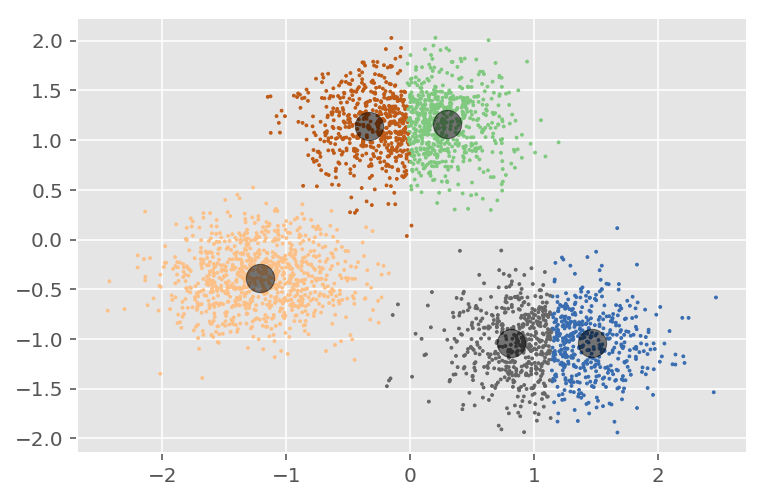

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_train_scaled [:, 0], X_train_scaled [:, 1], c=labels, s=2, cmap='Accent')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, 
alpha=0.5);

### 4. Determine an appropriate number of clusters based on the SSE.

### 4.1 Elbow method

use elbow method to plot SSE(Sum square Error) number of clusters 
Find smallest possible K with acceptable SSE
the graph show n = 3 may be the best number of clusters because 
number of cluster more than 3 made the the SSE drop insignificantly

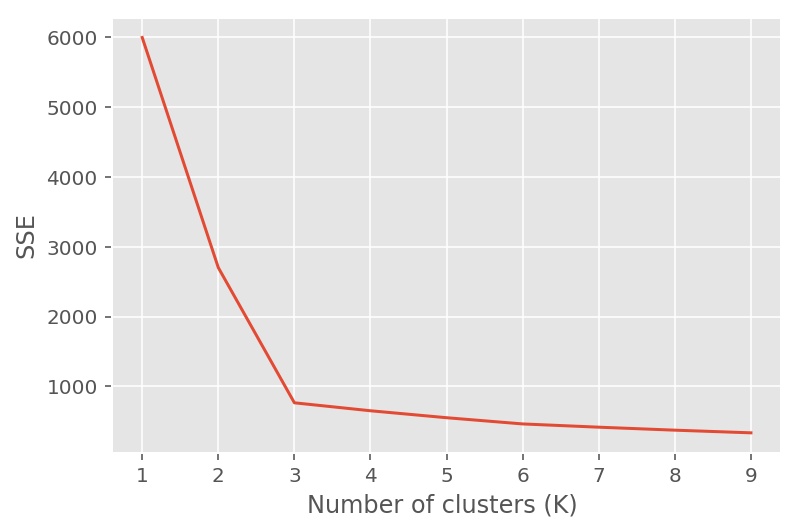

In [7]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X_train_scaled)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters (K) ")
plt.ylabel("SSE")
plt.show()

### 4.2 Silhouette coefficient

Silhouette coefficient is average of s(i)  s(i) =  (b - a) / max(a, b) 
a is intra-cluster distance
b is the distance between a sample and the nearest cluster that the sample is not a part of.
ref from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_train_scaled, labels)
print(silhouette_avg)

0.43219577185455393


### 5. Visualize the clustering result of the appropriate number of clusters.

From elbow method we find the most appropriate number of clusters is 3
So we visualize the clustering result as below

In [9]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #from elbow method
kmeans.fit(X_train_scaled)
labels = kmeans.predict(X_train_scaled) 

sse = kmeans.inertia_

centroids = kmeans.cluster_centers_

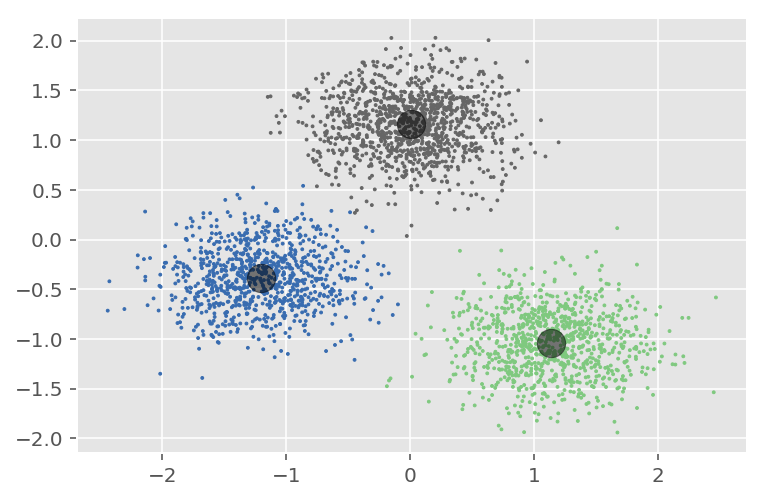

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_train_scaled [:, 0], X_train_scaled [:, 1], c=labels, s=2, cmap='Accent')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, 
alpha=0.5);

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_train_scaled, labels)
print(silhouette_avg)

0.6911757707642779
